In [1]:
import pandas as pd
import torch
import numpy as np

In [2]:
# Loss function: MSE
def loss_fn(target: torch.Tensor, network_output: torch.Tensor) -> torch.Tensor:
    return torch.mean(torch.square(target - network_output))

In [3]:
import sys
sys.path.append('..')

from utilities import linear_net

In [4]:
training_path = '../training_data/'
verification_path = '../verification_data/'
results_path = '../results/'
interpolating_for = 'exp_inv'

# Interpolating experiment

1. Plot target function and $\mathcal{NN}$ once training has concluded.
2. Represent the training process to visualize convergence.

In [17]:
verification_data = pd.read_csv(f"{verification_path}verification_{interpolating_for}_linspace_{1000}.csv")
xx = torch.tensor(verification_data['x'], dtype = torch.float32)[:, None]

In [26]:
n_inputs = [3, 5, 10, 15]
dimensions = [2, 3, 4, 5, 10, 15, 1000]
learning_rates = [-1, -2, -3]

In [25]:
for dim in [1000]:
    print(f'dim: {dim}')
    for lr_exp in learning_rates:
        print(f'lr {lr_exp}')
        for N in n_inputs:
            print(f'N {N}')
            # Load data
            input_data = pd.read_csv(f"{training_path}/input_{interpolating_for}_linspace_{N}.csv")
            x = torch.tensor(input_data['x'], dtype = torch.float32, requires_grad=False)[:, None]
            target = torch.tensor(input_data['y'], dtype = torch.float32, requires_grad=False)[:, None]

            for use_sigmoid in [True]:#[True, False]:
                # Get net
                NN = linear_net.Net(dim, torch.nn.Sigmoid()) if use_sigmoid \
                    else linear_net.Net(dim, torch.nn.ReLU(0.2))

                # Get optimizer
                optimizer = torch.optim.Adam(NN.parameters(), lr=1**lr_exp)

                # Training phase
                it_counter = 0
                while True:
                    optimizer.zero_grad()
                    loss = loss_fn(target, NN(x))
                    if loss < 1e-2 or it_counter > 10000:
                        network_output = np.reshape(NN(xx).detach().numpy(), newshape=-1)
                        net_type = 'sigmoid' if use_sigmoid else 'relu'
                        pd.DataFrame(data = { 'x': verification_data['x'], 
                                            'y_target': verification_data['y'], 
                                            'y_nn': network_output})\
                                    .to_csv(f'{results_path}/training_performance_{interpolating_for}_input{N}_{net_type}_lr{lr_exp}_dim{dim}.csv',
                                            index=False)
                        break
                    else:
                        loss.backward()
                        optimizer.step()
                        it_counter = it_counter + 1
                        print(f'it {it_counter}: {loss.item()}')

dim: 1000
lr -1
N 3
it 1: 0.40189123153686523
it 2: 90162.3125
it 3: 33969.26171875
it 4: 55673.6875
it 5: 22249.359375
it 6: 1394.4849853515625
it 7: 9906.7626953125
it 8: 20148.505859375
it 9: 14554.6005859375
it 10: 4348.82080078125
it 11: 54.70790100097656
it 12: 1631.2974853515625
it 13: 4839.56884765625
it 14: 5893.33349609375
it 15: 4217.76123046875
it 16: 1605.1693115234375
it 17: 133.37986755371094
it 18: 238.17735290527344
it 19: 1257.6837158203125
it 20: 2178.663330078125
it 21: 2272.183349609375
it 22: 1561.66796875
it 23: 629.2186889648438
it 24: 60.191097259521484
it 25: 88.55297088623047
it 26: 520.210693359375
it 27: 929.2887573242188
it 28: 986.1223754882812
it 29: 694.7702026367188
it 30: 294.2438659667969
it 31: 34.37106704711914
it 32: 29.659866333007812
it 33: 213.13255310058594
it 34: 406.2667541503906
it 35: 456.7306213378906
it 36: 338.1382751464844
it 37: 147.4864044189453
it 38: 17.089519500732422
it 39: 15.78481388092041
it 40: 110.64642333984375
it 41: 206.3

Evaluate accuracy of the algorithm according to dimensionality, learning rate and number of inputs:

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create empty table
shape = (len(learning_rates), len(n_inputs), len(dimensions))
results = np.zeros(shape)

for l_index in range(len(learning_rates)):
    for n_index in range(len(n_inputs)):
        for d_index in range(len(dimensions)):
            n = n_inputs[n_index]
            d = dimensions[d_index]
            l = learning_rates[l_index]

            # Read csv file
            file_name = f"{results_path}training_performance_{interpolating_for}_input{n}_sigmoid_lr{l}_dim{d}.csv"
            df = pd.read_csv(file_name)

            # Do the computations we need
            subtraction = df['y_nn'] - df['y_target']
            size = len(subtraction)
            results[l_index, n_index, d_index] = ((subtraction ** 2).sum() / size) ** 0.5

Plot accuracy and error:

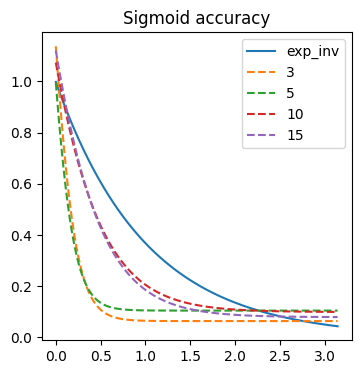

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.plot(verification_data['x'], verification_data['y'], label = interpolating_for)
file_path = f'training_performance_{interpolating_for}_input'
for N in n_inputs:
    df = pd.read_csv(f'{results_path}{file_path}{N}_sigmoid_lr-1_dim2.csv')
    plt.plot(df['x'], df['y_nn'], label = N, linestyle='--')
plt.legend()
plt.title('Sigmoid accuracy')
plt.show()

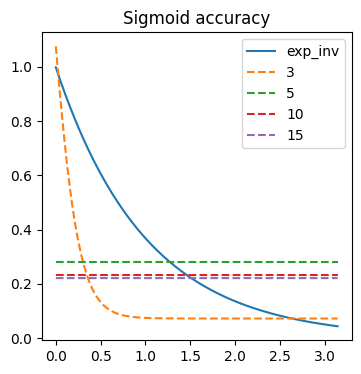

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.plot(verification_data['x'], verification_data['y'], label = interpolating_for)
file_path = f'training_performance_{interpolating_for}_input'
for N in n_inputs:
    df = pd.read_csv(f'{results_path}{file_path}{N}_sigmoid_lr-1_dim15.csv')
    plt.plot(df['x'], df['y_nn'], label = N, linestyle='--')
plt.legend()
plt.title('Sigmoid accuracy')
plt.show()

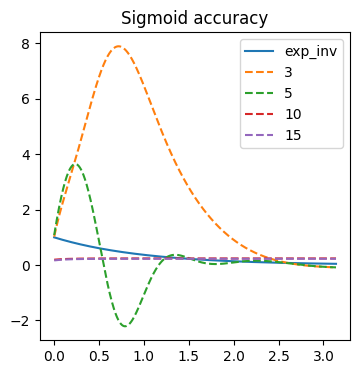

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.plot(verification_data['x'], verification_data['y'], label = interpolating_for)
file_path = f'training_performance_{interpolating_for}_input'
for N in n_inputs:
    df = pd.read_csv(f'{results_path}{file_path}{N}_sigmoid_lr-1_dim1000.csv')
    plt.plot(df['x'], df['y_nn'], label = N, linestyle='--')
plt.legend()
plt.title('Sigmoid accuracy')
plt.show()

# Show results

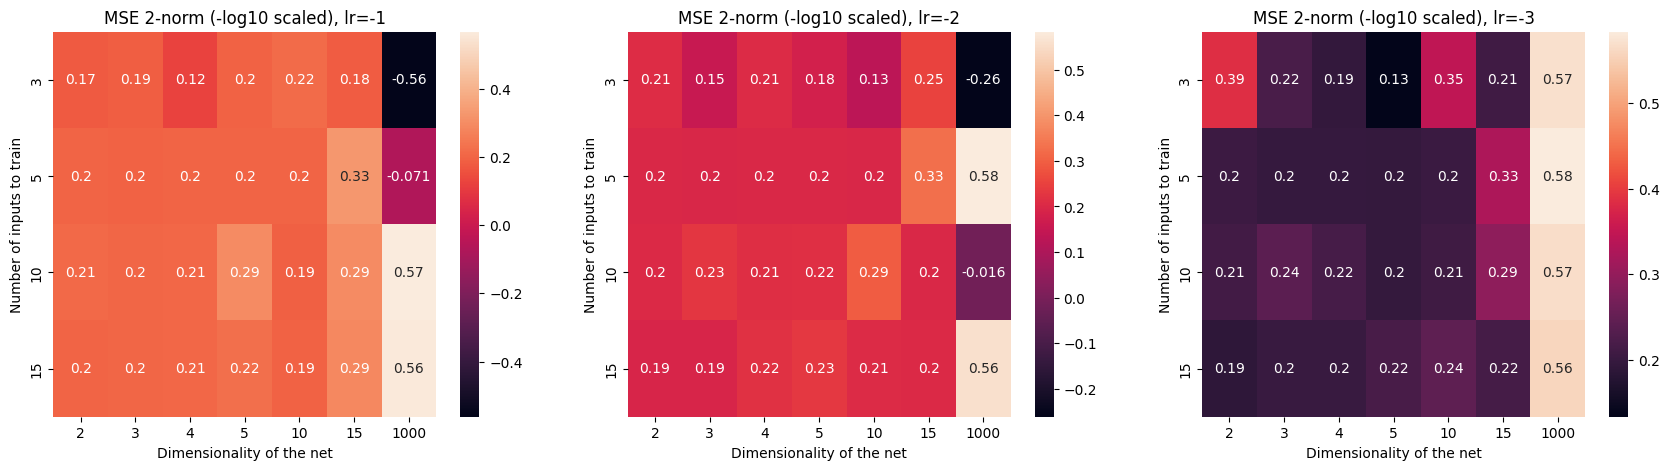

In [29]:
import seaborn
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (21, 5))
for ax_index in range(len(axes)):
    axes[ax_index].set_title(f'MSE 2-norm (-log10 scaled), lr={-(ax_index+1)}')

# x axis: dimension
# y axis: number of inputs

for idx in range(len(learning_rates)):
    input_data_sigmoid = -np.log10(results[idx]).reshape(len(n_inputs), len(dimensions))
    s = seaborn.heatmap(data = input_data_sigmoid, annot = input_data_sigmoid, 
                ax = axes[idx], xticklabels = dimensions, yticklabels = n_inputs)
    s.set(ylabel='Number of inputs to train', xlabel='Dimensionality of the net')